<h2><span>Demand Forecasting</span></h2>
<p>Can you forecast the demand of the car rentals on an hourly basis?</p>
<h2><br><span >Problem Statement</span></h2>
<p style="text-align: justify;">ABC is a car rental company based out of Bangalore. It rents cars for both in and out stations at affordable prices. The users can rent different types of cars like Sedans, Hatchbacks, SUVs and MUVs, Minivans and so on.</p>
<p style="text-align: justify;">In recent times, the demand for cars is on the rise. As a result, the company would like to tackle the problem of supply and demand. The ultimate goal of the company is to strike the balance between the supply and demand inorder to meet the user expectations.&nbsp;</p>
<p style="text-align: justify;">The company has collected the details of each rental. Based on the past data, the company would like to forecast the demand of car rentals on an hourly basis.&nbsp;</p>
<h2><br><span >Objective</span></h2>
<p>The main objective of the problem is to develop the machine learning approach to forecast the demand of car rentals on an hourly basis.</p>
<h2><br><span >Data Dictionary</span></h2>
<p>You are provided with 3 files - train.csv, test.csv and sample_submission.csv</p>
<p><span >Training set</span></p>
<p><strong>train.csv</strong> contains the hourly demand of car rentals from August 2018 to February 2021.<br><br></p>
<table border="1" style="margin-right: calc(51%); width: 49%;">
<tbody>
<tr>
<td style="width: 42.3159%;">
<p><strong>Variable</strong></p>
</td>
<td style="width: 57.3774%;">
<p><strong>Description</strong></p>
</td>
</tr>
<tr>
<td style="width: 42.3159%;">
<p>date</p>
</td>
<td style="width: 57.3774%;">
<p>Date (yyyy-mm-dd)</p>
</td>
</tr>
<tr>
<td style="width: 42.3159%;">
<p>hour</p>
</td>
<td style="width: 57.3774%;">
<p>Hour of the day</p>
</td>
</tr>
<tr>
<td style="width: 42.3159%;">
<p>demand</p>
</td>
<td style="width: 57.3774%;">
<p>No. of car rentals in a hour</p>
</td>
</tr>
</tbody>
</table>
<h3><br><span >Test set</span></h3>
<p><strong>test.csv</strong> contains only 2 variables: date and hour. You need to predict the hourly demand of car rentals for the next 1 year i.e. from March 2021 to March 2022.<br><br></p>
<table border="1" style="margin-right: calc(52%); width: 48%;">
<tbody>
<tr>
<td style="width: 45.5735%;">
<p><strong>Variable</strong></p>
</td>
<td style="width: 53.3956%;">
<p><strong>Description</strong></p>
</td>
</tr>
<tr>
<td style="width: 45.5735%;">
<p>date</p>
</td>
<td style="width: 53.3956%;">
<p>Date (yyyy-mm-dd)</p>
</td>
</tr>
<tr>
<td style="width: 45.5735%;">
<p>hour</p>
</td>
<td style="width: 53.3956%;">
<p>Hour of the day</p>
</td>
</tr>
</tbody>
</table>
<h2><br><span >Submission File Format</span></h2>
<p><strong>sample_submission.csv&nbsp;</strong>contains 3 variables - date, hour and demand<br><br></p>
<table border="1" style="margin-right: calc(52%); width: 48%;">
<tbody>
<tr>
<td style="width: 45.4859%;">
<p><strong>Variable</strong></p>
</td>
<td style="width: 54.2006%;">
<p><strong>Description</strong></p>
</td>
</tr>
<tr>
<td style="width: 45.4859%;">
<p>date</p>
</td>
<td style="width: 54.2006%;">
<p>Date (yyyy-mm-dd)</p>
</td>
</tr>
<tr>
<td style="width: 45.4859%;">
<p>hour</p>
</td>
<td style="width: 54.2006%;">
<p>Hour of the day</p>
</td>
</tr>
<tr>
<td style="width: 45.4859%;">
<p>demand</p>
</td>
<td style="width: 54.2006%;">
<p>No. of car rentals in a hour</p>
</td>
</tr>
</tbody>
</table>
<h2><br><span>Evaluation metric</span></h2>
<p>The evaluation metric for this hackathon is RMSE score.</p>




### Solution

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import holidays

In [3]:
train=pd.read_csv('train_rental.csv')
test=pd.read_csv('test_rental.csv')
submit=pd.read_csv('sample_rental.csv')

In [4]:
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [5]:
test.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [11]:
train[train.duplicated()]

,date,hour,demand


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [37]:
df=train.copy()
df_test=test.copy()

In [15]:
#converting date into date column
#df['date']=pd.to_datetime(df['date'])
#df_test['date']=pd.to_datetime(df_test['date'])


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [16]:
#returns 1 if its holiday else 0
def check_holidays(date):
    if date in holidays.IN() or date in holidays.US():
        return 1
    else:
        return 0

In [19]:
def check_season(month):
    if month in [3,4,5,6]:
        return 0 #summer
    elif month in [7,8,9,10]:
        return 1 #fall
    elif month in [11,12,1,2]:
        return 2 #winter

In [20]:
def day_part(hour):
    if hour in [4,5]:
        return "dawn"
    elif hour in [6,7]:
        return "early morning"
    elif hour in [8,9,10]:
        return "morning"
    elif hour in [11,12,13]:
        return "noon"
    elif hour in [14,15,16]:
        return "afternoon"
    elif hour in [17, 18,19]:
        return "evening"
    elif hour in [20, 21, 22,23]:
        return "night"
    elif hour in [24,1,2,3]:
        return "midnight"


In [40]:
def preprocessing(df):
    df['date'] = pd.to_datetime(df['date'])
    df['year']=df['date'].dt.year
    df['month']=df['date'].dt.month
    df['day']=df['date'].dt.day
    df['dayofweek']=df['date'].dt.dayofweek
    df['season']=df['month'].apply(check_season)
    df['is_weekend']=df['dayofweek'].apply(lambda x:1 if x in ['Saturday','Sunday',5,6] else 0)
    df['after_weekend']=df['dayofweek'].apply(lambda x:1 if x in['Monday',0] else 0)
    df['is_holiday']=df['date'].apply(check_holidays)
    
    df.set_index('date',inplace=True)
    df.sort_index(inplace=True)
    return df

In [41]:
df=preprocessing(df)
df_test=preprocessing(df_test)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18247 entries, 2018-08-18 to 2021-02-28
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   hour           18247 non-null  int64
 1   demand         18247 non-null  int64
 2   year           18247 non-null  int64
 3   month          18247 non-null  int64
 4   day            18247 non-null  int64
 5   dayofweek      18247 non-null  int64
 6   season         18247 non-null  int64
 7   is_weekend     18247 non-null  int64
 8   after_weekend  18247 non-null  int64
 9   is_holiday     18247 non-null  int64
dtypes: int64(10)
memory usage: 1.5 MB


In [44]:
df.tail()

,hour,demand,year,month,day,dayofweek,season,is_weekend,after_weekend,is_holiday
date,,,,,,,,,,
2021-02-28,19,95,2021,2,28,6,2,1,0,0
2021-02-28,20,88,2021,2,28,6,2,1,0,0
2021-02-28,21,39,2021,2,28,6,2,1,0,0
2021-02-28,22,104,2021,2,28,6,2,1,0,0
2021-02-28,23,85,2021,2,28,6,2,1,0,0


C:\Users\91999\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


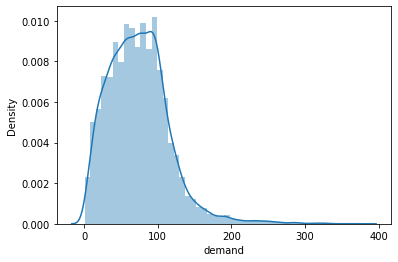

In [45]:
#checking distribution of target variable
sns.distplot(df['demand'],kde=True)

The plot above shows that the demand is right skewed

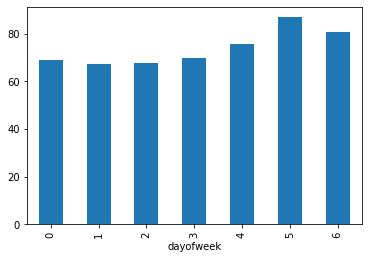

In [47]:
df.groupby('dayofweek').mean()['demand'].plot(kind='bar')

The demand is at peak on saturday as it is start of weekend. Followed by sunday and monday

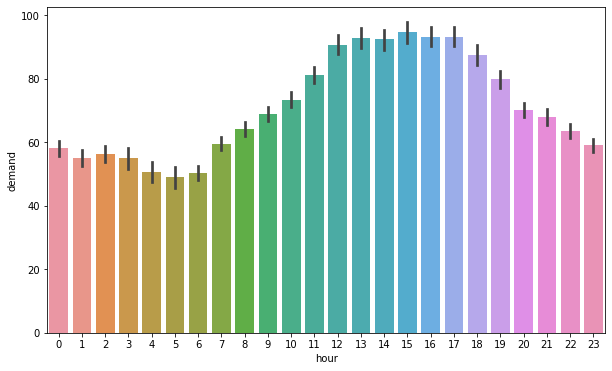

In [48]:
#Barplot of demand according to hour
plt.figure(figsize=(10,6))
sns.barplot(x='hour',y='demand',data=df)

From the above graph we could see that demand is higher in afternoon and evening hours

C:\Users\91999\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


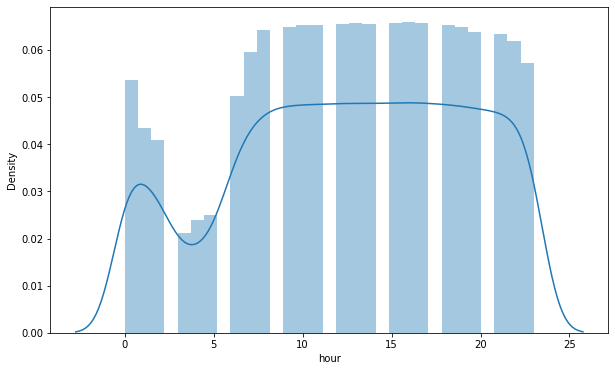

In [50]:
#Distribution of hour column
plt.figure(figsize=(10,6))
sns.distplot(df['hour'],kde=True)

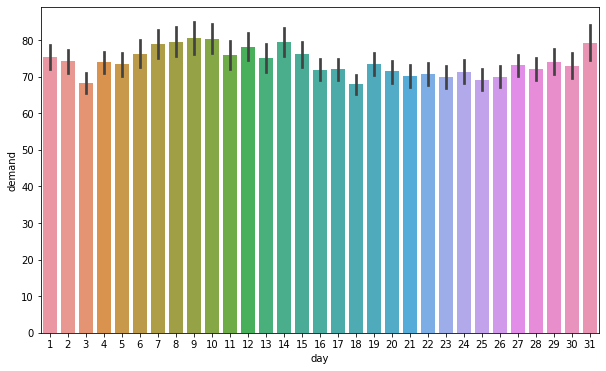

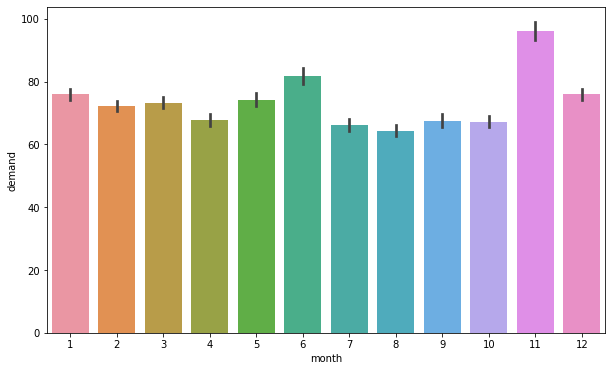

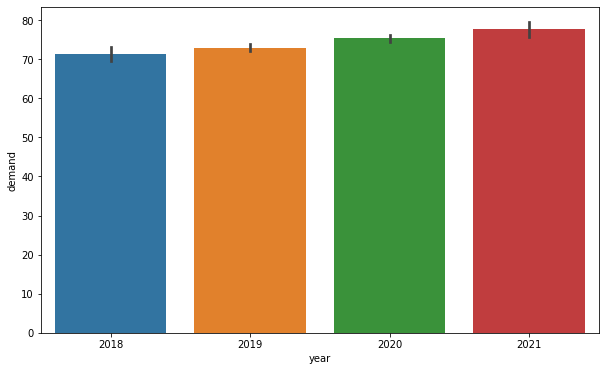

In [51]:
#Barplot for demand according to day,month and year
cols=['day','month','year']

for i in cols:
    plt.figure(figsize=(10,6))
    sns.barplot(x=i,y='demand',data=df)

Year on Year the demand is increasing

On the month of november the demand is high, followed by june. Average demand is around 75

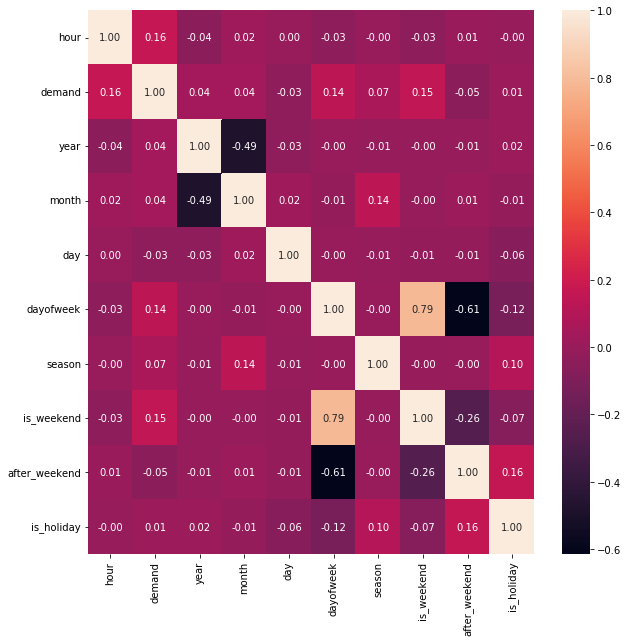

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),fmt='.2f',annot=True)

In [58]:
#This code deletes the models which are highly correlated
corr=df.corr()
columns=np.full((corr.shape[0],), True, dtype=bool)

In [59]:
columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [60]:
for i in range(corr.shape[0]):
    for j in range(i+1,corr.shape[0]):
        if corr.iloc[i,j] >=0.9:
            if columns[j]:
                columns[j]=False
selected_columns=df.columns[columns]
            
#df=df[selected_columns]


In [61]:
selected_columns

Index(['hour', 'demand', 'year', 'month', 'day', 'dayofweek', 'season',
       'is_weekend', 'after_weekend', 'is_holiday'],
      dtype='object')

In [62]:
# Separating the Columns into Target Variables and Feature Variable

y = df['demand']
X = df.drop(columns = ['demand'])

In [63]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [65]:
X2=sm.add_constant(X)
s=sm.OLS(y,X2)
s2=s.fit()

In [66]:
print(s2.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     141.1
Date:                Sat, 28 May 2022   Prob (F-statistic):          1.11e-258
Time:                        11:30:58   Log-Likelihood:                -93338.
No. Observations:               18247   AIC:                         1.867e+05
Df Residuals:                   18237   BIC:                         1.868e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8757.6942    854.344    -10.251

In [67]:
from sklearn.metrics import mean_squared_error,r2_score

In [72]:
#Splitting the dataset into train and test data. As it is time series daa we should split based on random state in train test spit. Lets split as 75 % 25%
split=int(round(df.shape[0]*0.75,0))

X_train=df[:split].drop(['demand'],axis=1)
y_train=df[:split]['demand']

X_test=df[split:].drop(['demand'],axis=1)
y_test=df[split:]['demand']

In [73]:
lr=LinearRegression()

In [74]:
lr.fit(X_train,y_train)

LinearRegression()

In [75]:
y_pred=lr.predict(X_test)

In [76]:
np.sqrt(mean_squared_error(y_test,y_pred))

41.99490830576286

In [77]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
np.sqrt(mean_squared_error(y_test,rf_pred))

38.15093392685756

In [78]:
from xgboost import XGBRegressor

In [80]:
xg=XGBRegressor()
xg.fit(X_train,y_train)
xg_pred=xg.predict(X_test)
np.sqrt(mean_squared_error(y_test,xg_pred))

38.14215394207193

In [81]:
from lightgbm import LGBMRegressor


In [82]:
lg=LGBMRegressor()
lg.fit(X_train,y_train)
lg_pred=lg.predict(X_test)
np.sqrt(mean_squared_error(y_test,lg_pred))

35.61933405138024

In [83]:
from sklearn.model_selection import GridSearchCV

In [87]:
lgsv=GridSearchCV(estimator=LGBMRegressor(),
                  param_grid={"estimator_learning_rate": (0.01,0.04),
                 "estimator_n_estimators":(100,200),"estimator_max_bin":(32,64),"estimator_max_depth":(5,7,9),
                  "estimator_num_leaves":(32,64)}
                              ,cv=3,scoring="neg_mean_squared_error",verbose=1,n_jobs=-1)

lreg=lgsv.fit(X_train,y_train)
print(lreg.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[LightGBM] [Warning] Unknown parameter: estimator_learning_rate
[LightGBM] [Warning] Unknown parameter: estimator_max_bin
[LightGBM] [Warning] Unknown parameter: estimator_max_depth
[LightGBM] [Warning] Unknown parameter: estimator_n_estimators
[LightGBM] [Warning] Unknown parameter: estimator_num_leaves
{'estimator_learning_rate': 0.01, 'estimator_max_bin': 32, 'estimator_max_depth': 5, 'estimator_n_estimators': 100, 'estimator_num_leaves': 32}


In [90]:
print("RMSE Score:- {0}".format(mean_squared_error(y_test, lgsv.predict(X_test), squared=False)))

RMSE Score:- 35.61933405138024


In [95]:
importances=lg.feature_importances_

In [96]:
indices=np.argsort(importances)

In [97]:
feat_importances=pd.Series(importances,index=X.columns)

In [98]:
feat_importances

hour             782
year             235
month            659
day              883
dayofweek        357
season            64
is_weekend         0
after_weekend      0
is_holiday        20
dtype: int32

Text(0.5, 0, 'Relative Importance')

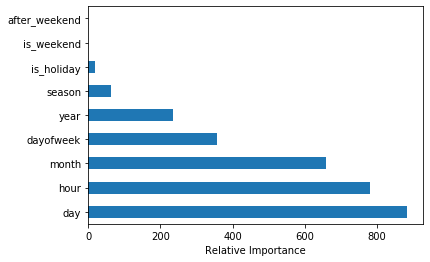

In [99]:
feat_importances.nlargest(12).plot(kind='barh')
plt.xlabel('Relative Importance')


In [100]:
testpred = lgsv.predict(df_test)

In [103]:
testpred

array([61.92867692, 52.00903874, 52.38073518, ..., 67.47549238,
       67.62760894, 59.40040031])

In [104]:
submit.head()

,date,hour,demand
0,2021-03-01,0,0
1,2021-03-01,1,0
2,2021-03-01,2,0
3,2021-03-01,3,0
4,2021-03-01,5,0


In [109]:
submit['demand']=np.round(testpred, 0)

In [110]:
submit.head()

,date,hour,demand
0,2021-03-01,0,62.0
1,2021-03-01,1,52.0
2,2021-03-01,2,52.0
3,2021-03-01,3,54.0
4,2021-03-01,5,53.0


In [114]:
submit['demand']=submit['demand'].astype('int32')

In [115]:
submit.head()

,date,hour,demand
0,2021-03-01,0,62
1,2021-03-01,1,52
2,2021-03-01,2,52
3,2021-03-01,3,54
4,2021-03-01,5,53
